### Créer la matrice d'adjacence:

Avec un masque et des valeurs de tenseurs de diffusion

In [1]:
# ! pip  install nibabel
!python 1_build_adj_matrix.py ../data/simplePhantoms/fanning_2d_5bundles/wm_vf.nii.gz ../data/simplePhantoms/fanning_2d_5bundles/fods.nii.gz --threshold 0.2 graph 

Figure(640x480)


### Afficher le graphe: 

Figure(640x480)


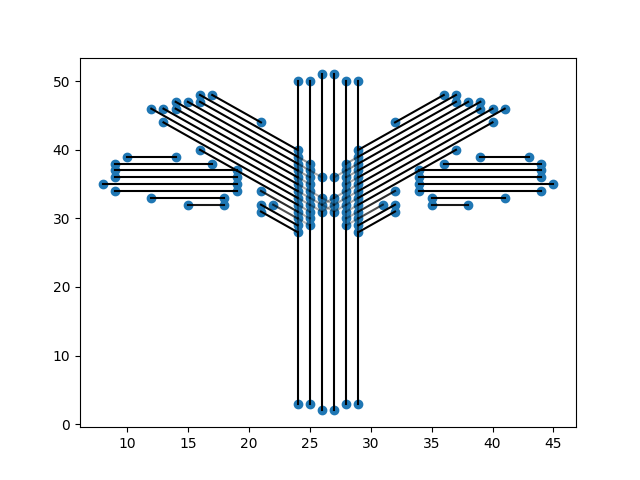

In [2]:
import sys


sys.path.append(r"C:\Users\harsh\quactography")

from IPython.display import Image, display  # type: ignore
!python 2_draw_adj_matrix.py graph.npz
display(Image(filename='graph_adj_mat.png'))




### Filtrer le graphe pour avoir uniquement les noeuds fortement connectés:

In [3]:
!python 1_build_adj_matrix.py ../data/wm.nii.gz ../data/fodf.nii.gz graph --threshold 0.4


Traceback (most recent call last):
  File "c:\Users\harsh\quactography\scripts\1_build_adj_matrix.py", line 95, in <module>
    main()
  File "c:\Users\harsh\quactography\scripts\1_build_adj_matrix.py", line 72, in main
    weighted_graph, node_indices = build_weighted_graph(
  File "c:\users\harsh\quactography\quactography\adj_matrix\reconst.py", line 68, in build_weighted_graph
    sf = sh_to_sf(sh, sphere, sh_order=12, basis_type="tournier07")
  File "c:\Users\harsh\.virtualenv\quactography\lib\site-packages\dipy\reconst\shm.py", line 1237, in sh_to_sf
    sf = np.dot(sh, B.T)
ValueError: shapes (64,64,45) and (91,8) not aligned: 45 (dim 2) != 91 (dim 0)


Figure(640x480)


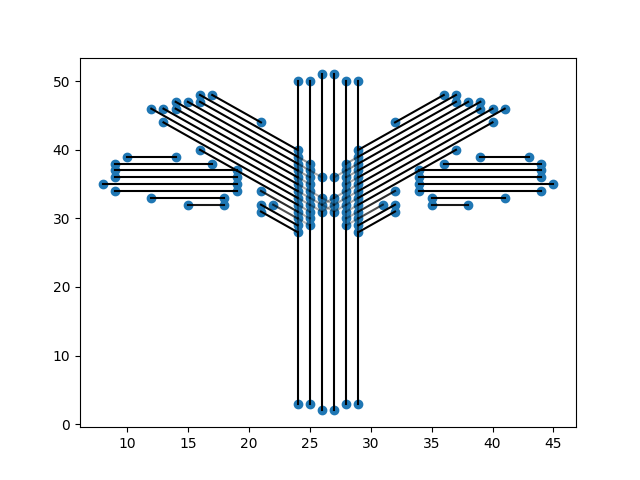

In [4]:
!python 2_draw_adj_matrix.py graph.npz
display(Image(filename='graph_adj_mat.png'))

### Créer une matrice d'adjacence aléatoire:

In [5]:
!python 1_build_random_adj_matrix.py 3 3 True rand_graph

3
3


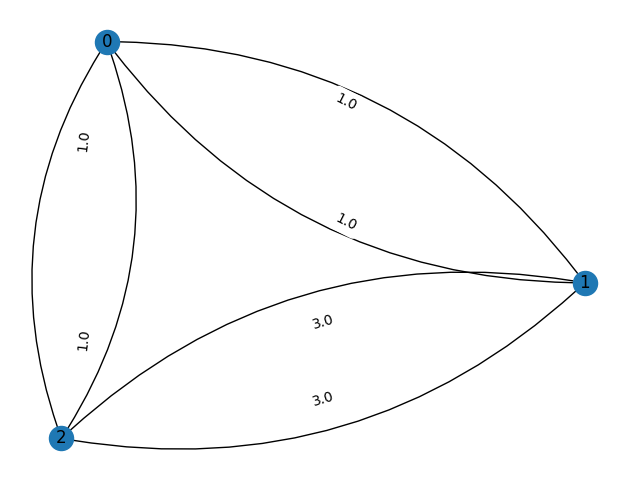

In [6]:
!python 2_draw_random_adj_matrix.py rand_graph rand_graph_visu
display(Image(filename='rand_graph_visu.png'))

### Lancer l'algorithme de qaoa pour maximiser la valeur absolue des poids: 

nom de la matrice d'adjacence, noeud départ, noeud fin, nom du fichier d'infos, valeurs de la constante de pénalité, nombre de répétitions de QAOA, nombre de processeurs 

In [7]:
!python 3_find_max_intensity_diffusion_path.py rand_graph 1 0 qaoa_solver_infos edge --alphas  2   --reps 1  -npr 1 


 Calculating qubits as edges......................
------------------------MULTIPROCESS SOLVER FINISHED-------------------------------
SparsePauliOp(['III', 'IIZ', 'IZI', 'ZII', 'III', 'ZIZ', 'IZZ', 'ZZI'],
              coeffs=[-2.5+0.j,  0.5-0.j,  0.5-0.j,  1.5-0.j,  6. +0.j,  1. +0.j,  1. +0.j,
 -4. +0.j])


### Visualiser les chemins qui maximise la valeur absolue des poids:

In [8]:
from IPython.display import Image, display  # type: ignore
!python 4_plot_distribution_probabilities.py qaoa_solver_infos_alpha_1.npz qaoa_solver_infos_alpha_2.npz qaoa_solver_infos_alpha_3.npz visu_total_dist visu_selected_dist edge
# display(Image(filename='visu_selected_dist.png'))
# display(Image(filename=r'..\output\img\visu_tout_alpha_4.png'))

### Visualiser les chemins optimaux:

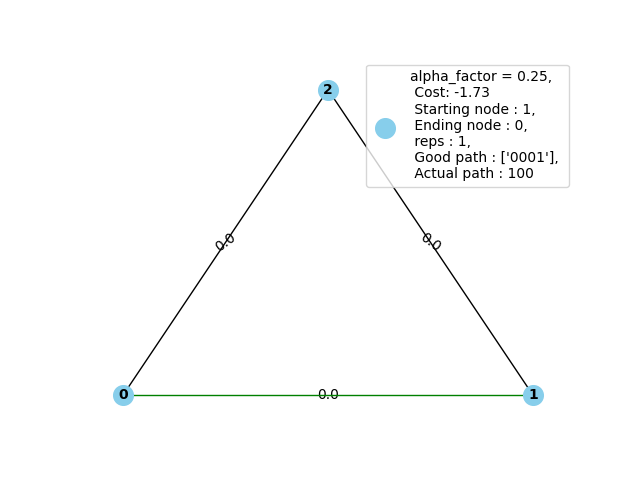

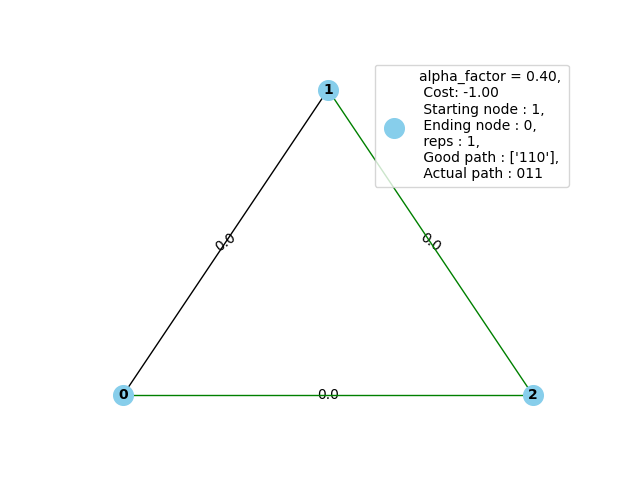

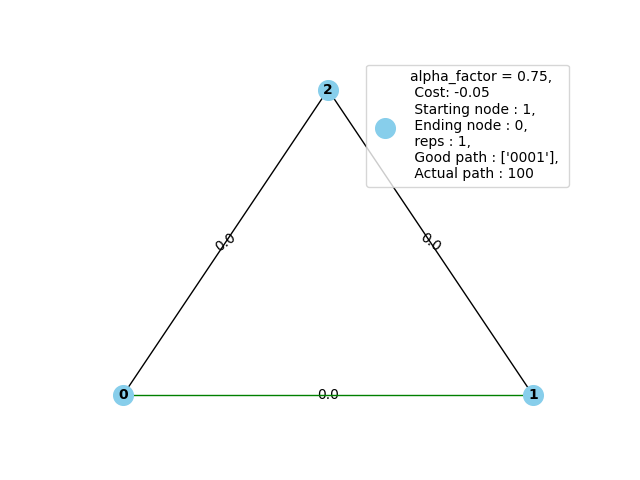

In [9]:
!python 5_plot_optimal_paths.py graph qaoa_solver_infos_alpha_1.npz qaoa_solver_infos_alpha_2.npz qaoa_solver_infos_alpha_3.npz opt_paths edge
display(Image(filename='opt_paths_0_alpha_1.00.png'))
display(Image(filename='opt_paths_1_alpha_2.00.png'))
display(Image(filename='opt_paths_2_alpha_3.00.png'))